<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - IsolationForest - Fraud Detection
</b></font> </br></p>

---


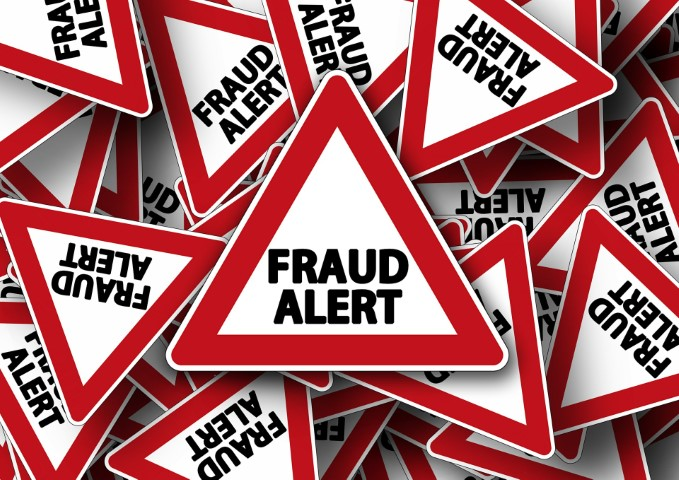

Bild von <a href="https://pixabay.com/de/users/geralt-9301/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=464641">Gerd Altmann</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=464641">Pixabay</a>

# **1  <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Der Datensatz enthält fiktive Kreditkartentransaktionen.
Jeder Datensatz stellt Transaktionen dar, 100 Betrugsfälle bei 5.000 Transaktionen haben. Der Datensatz ist sehr unausgewogen, die positive Klasse (Betrug) macht 2% aller Transaktionen aus.

Der Datensatz enthält nur numerische Eingabevariablen, die das Ergebnis einer PCA-Transformation sind. Die Zielgröße nimmt im Betrugsfall den Wert 1 und andernfalls den Wert 0 an.

Angesichts des Klassenungleichgewichtsverhältnisses empfiehlt sich, die Genauigkeit anhand der Fläche unter der Präzisions-Recall-Kurve (AUPRC) zu messen. Die Genauigkeit der Konfusionsmatrix ist für eine unausgeglichene Klassifikation nicht aussagekräftig.   

<br>


<p><font color='black' size="5">
Erstellung fiktives Fraud-DataSet
</font></p>

In [ ]:
!pip install -q pyod

In [ ]:
from pyod.utils.data import generate_data

In [ ]:
contamination = 0.02  # percentage of outliers
n_train = 5000  # number of training points
n_test = 0  # number of testing points
n_features = 5

data, _, target, _ = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=n_features,
                      contamination=contamination,
                      random_state=42)

In [ ]:
import pandas as pd
data = pd.DataFrame(data)
data.columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
target = pd.DataFrame(target)

In [ ]:
target_pred.value_counts()

# **2 <font color='orange'>|</font> Prepare**

---

# **3 <font color='orange'>|</font> Modeling**
---

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=500, contamination=0.02,random_state=42)
model.fit(data, target)

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_pred = model.predict(data)

In [ ]:
target_pred = pd.DataFrame(target_pred)
target_pred.columns = ['pred']
target_pred.value_counts()

In [ ]:
# Der Anomaliewert der Eingabestichproben. Je niedriger, desto abnormaler. Negative Werte stellen Outlier dar, positive Werte Inliers.
score = model.decision_function(data)

<p><font color='black' size="5">
Umcodierung Ergebnisse Isolation Forest
</font></p>

In [ ]:
target_pred.replace([-1, 0, 1], [1, 0, 0], inplace = True)

In [ ]:
target = pd.DataFrame(target)
target.rename(columns = {0: 'real'}, inplace = True)


<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target, target_pred)
plt.rcParams['figure.figsize'] = [5, 5]
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target, target_pred, target_names=['No','Yes']))

<p><font color='black' size="5">
Streudiagramm
</font></p>

Dimensionsreduktion auf 2d für Steudiagramm

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data)
data_pca=pca.transform(data)

Aufbau Würfel für Streudiagramm

In [ ]:
from pandas.plotting import scatter_matrix
data_ = pd.DataFrame(data_pca)
data_.columns = ['PCA1', 'PCA2']

Switch auf kategoriale Werte im Target

In [ ]:
target_cat = pd.DataFrame(target)
target_cat[target_cat == 0] = 'No'
target_cat[target_cat == 1] = 'Yes'
data_['Fraud Real'] = target_cat

target_pred_cat = pd.DataFrame(target_pred)
target_pred_cat[target_pred_cat == 0] = 'No'
target_pred_cat[target_pred_cat == 1] = 'Yes'
data_['Fraud Prediction'] = target_pred_cat

Aufbau Diagramme

In [ ]:
fig1 = px.scatter(data_, x='PCA1', y='PCA2', opacity=0.6, color='Fraud Real')
fig1.update_traces(marker_size=5)
fig1.update_layout(height=600, width=600, title_text="Fraud - Real")


fig2 = px.scatter(data_, x='PCA1', y='PCA2', opacity=0.6, color='Fraud Prediction')
fig2.update_traces(marker_size=5)
fig2.update_layout(height=600, width=600, title_text="Fraud - Prediction")

fig1.show()
fig2.show()

<p><font color='black' size="5">
Entscheidungsbaum - graphviz
</font></p>

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
estimator = model.estimators_[0]
export_graphviz(estimator,out_file='tree.dot',max_depth=10,
                feature_names = data.columns,
                special_characters=True,rounded=True,precision=2)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

# **5 <font color='orange'>|</font> Deploy**
---